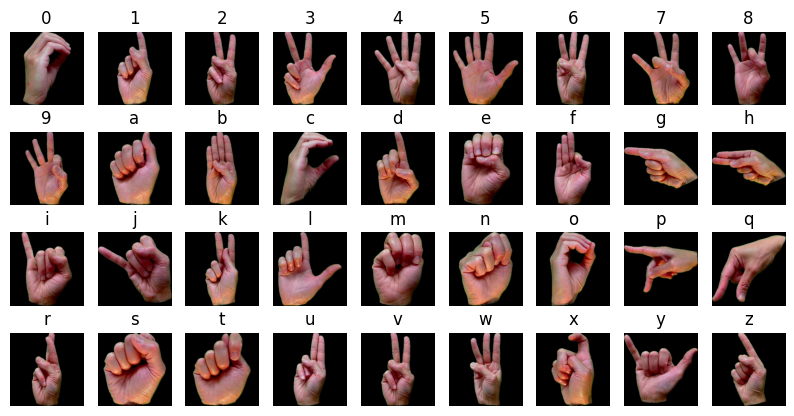

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "./asl_dataset/"

fig, ax = plt.subplots(4, 9, figsize=(10, 5))
img_classes = [os.path.join(path, im) for im in os.listdir(path)]
ax = ax.flatten()

data, label = [], []

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

    # Przetwarzanie obrazu
    img = cv2.resize(image, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
    label.append(os.path.basename(img_class))

plt.show()

data = np.array(data)
label = np.array(label)
label = label.astype(str)



In [52]:
import cv2 as cv
import math as m

path = "./asl_dataset/"

labels = os.listdir(path)
X_train = []
y_train = []
X_test = []
y_test = []


for i, label in enumerate(labels):
    folderpath = path + label + '/'
    for file in os.listdir(folderpath)[0:m.floor(len(os.listdir(folderpath))*0.7)]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (128, 128))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[m.floor(len(os.listdir(folderpath))*0.7):]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (128, 128))
        X_test.append(np.array(img))
        y_test.append(i)
   

X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1760, 128, 128, 3)
(1760,)
(755, 128, 128, 3)
(755,)


<function matplotlib.pyplot.show(close=None, block=None)>

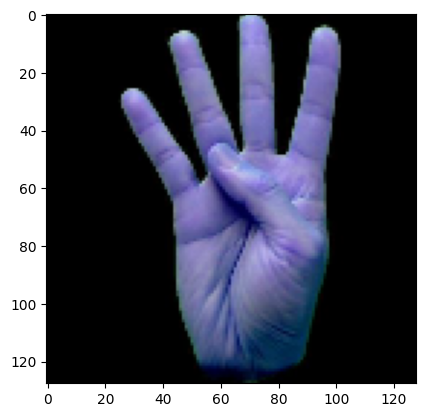

In [53]:
num_img = 220

plt.imshow(X_train[num_img])
plt.show

In [54]:
print(labels[y_test[num_img]])

a


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(criterion='entropy', max_depth=12)
random_forest.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred = random_forest.predict(X_test.reshape(len(X_test), -1))

accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji: {:.2f}%".format(accuracy * 100))

Dokładność klasyfikacji: 63.44%


Text(0.5, 1.0, 'Accuracy Score: 0.6344370860927152')

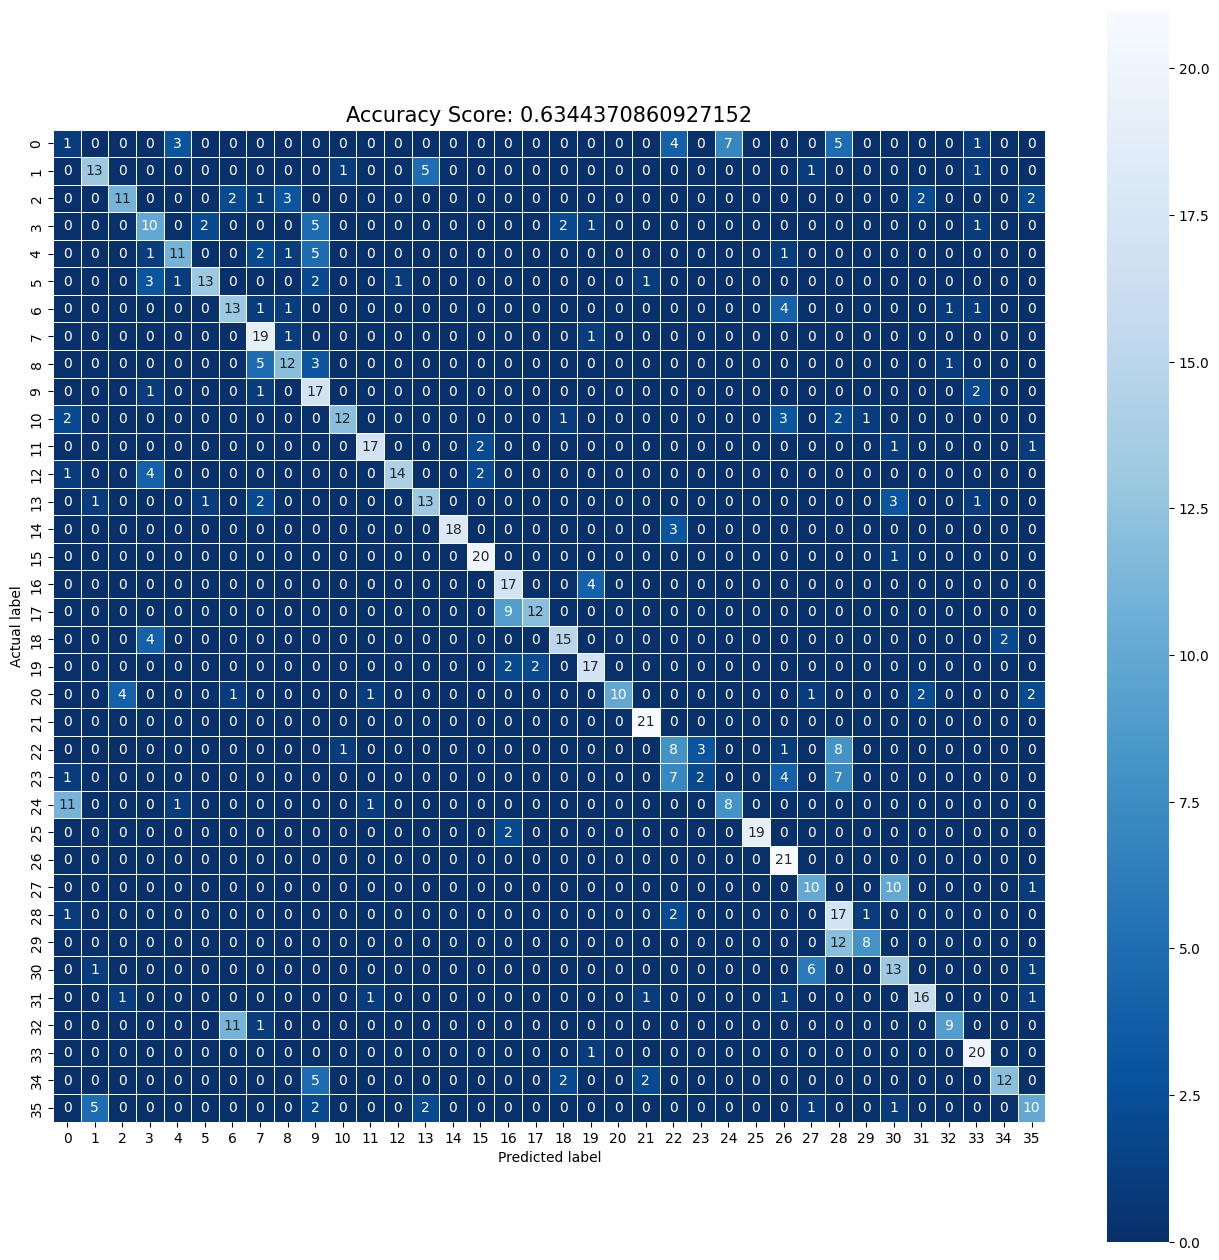

In [42]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,16))
sns.heatmap(cm,annot=True, fmt='.0f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15)


In [29]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (1760, 128, 128, 3) (1760,)
Validation set shapes: (227, 128, 128, 3) (227,)
Test set shapes: (528, 128, 128, 3) (528,)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [34]:
base_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(36, activation='softmax'),
])


In [35]:
base_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

base_history = base_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
55/55 [==============================] - 16s 274ms/step - loss: 1.3072 - accuracy: 0.6528 - val_loss: 2.3926 - val_accuracy: 0.4934
Epoch 2/20
55/55 [==============================] - 14s 262ms/step - loss: 0.1446 - accuracy: 0.9545 - val_loss: 2.0872 - val_accuracy: 0.5859
Epoch 3/20
55/55 [==============================] - 14s 258ms/step - loss: 0.0444 - accuracy: 0.9835 - val_loss: 2.8241 - val_accuracy: 0.6167
Epoch 4/20
55/55 [==============================] - 14s 260ms/step - loss: 0.0418 - accuracy: 0.9881 - val_loss: 3.0675 - val_accuracy: 0.6167


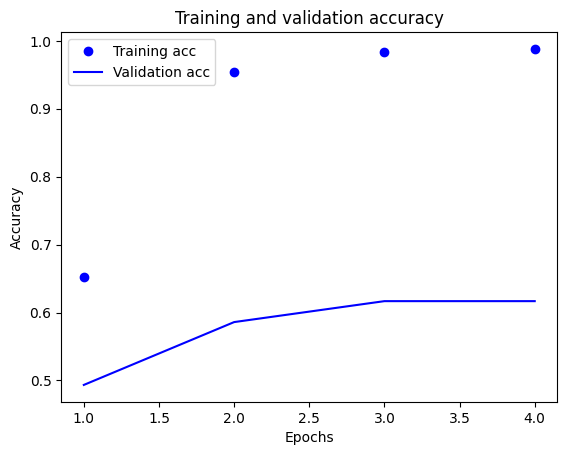

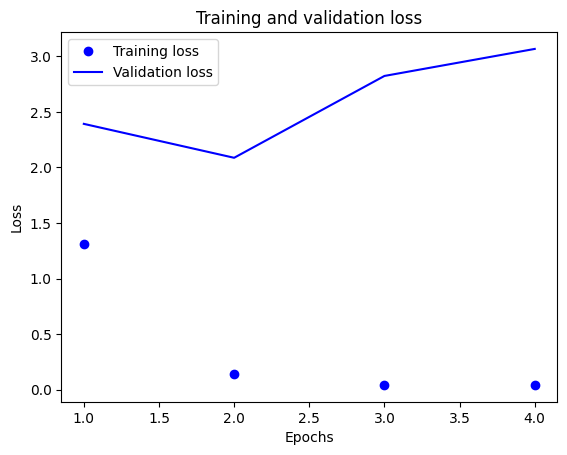

In [37]:
acc = base_history.history['accuracy']
val_acc = base_history.history['val_accuracy']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [38]:
results = base_model.evaluate(X_test, y_test)
print(results)

17/17 [==============================] - 1s 48ms/step - loss: 2.8445 - accuracy: 0.6250
[2.844515562057495, 0.625]
